# Limpieza y Preparación de Datos con Pandas

## Introducción
Este notebook cubre técnicas esenciales para la limpieza y preparación de datos usando Pandas.


## 1. Cargar datos
Simulación de un DataFrame inicial para ilustrar los ejemplos.

In [23]:
import pandas as pd
import numpy as np


In [24]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', None, 'Diana', 'Luis', 'Ana', 'Maria', 'Pedro'],
    'Edad': [25, 30, np.nan, 22, 29, 30, 25, None, 28],
    'Ciudad': ['Quito', 'Guayaquil', 'Quito', 'Cuenca', None, 'Guayaquil', 'Quito', 'Cuenca', 'Quito'],
    'Ingreso': [3000, 4500, np.nan, 2800, 3200, 4500, 3000, 3100, None],
    'Activo': [True, True, False, True, False, True, True, False, True]
}
df = pd.DataFrame(data)
display(df)

,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,NaN,Quito,NaN,False
3,None,22.0,Cuenca,2800.0,True
4,Diana,29.0,None,3200.0,False
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True
7,Maria,NaN,Cuenca,3100.0,False
8,Pedro,28.0,Quito,NaN,True


In [25]:
print(df.isna())
print(df.isna().sum())

   Nombre   Edad  Ciudad  Ingreso  Activo
0   False  False   False    False   False
1   False  False   False    False   False
2   False   True   False     True   False
3    True  False   False    False   False
4   False  False    True    False   False
5   False  False   False    False   False
6   False  False   False    False   False
7   False   True   False    False   False
8   False  False   False     True   False
Nombre     1
Edad       2
Ciudad     1
Ingreso    2
Activo     0
dtype: int64



## 2. Identificación de valores faltantes
### Visualización de valores faltantes con `isna()` y mapa de calor.

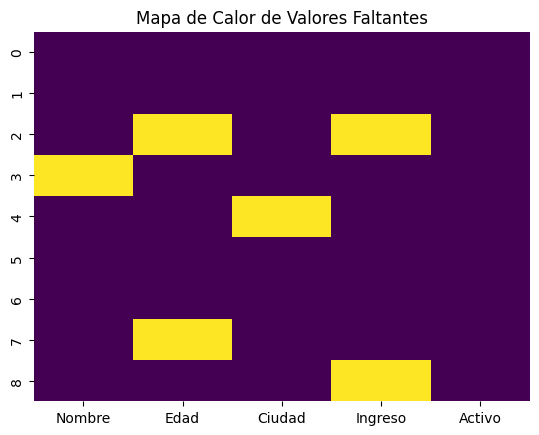

In [26]:


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

## 3. Manejo de valores faltantes
### Eliminación y relleno de valores faltantes.

In [27]:
# Eliminación
df_aux=df.copy()
df_aux = df_aux.dropna()
display(df_aux)

display(df)



,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True


,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,NaN,Quito,NaN,False
3,None,22.0,Cuenca,2800.0,True
4,Diana,29.0,None,3200.0,False
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True
7,Maria,NaN,Cuenca,3100.0,False
8,Pedro,28.0,Quito,NaN,True


In [28]:
# Relleno con valores personalizados

df_aux2=df.copy()

df_fillna = df_aux2.fillna({
    'Nombre': 'Jhon Doe',
    'Edad': df['Edad'].mean(),
    'Ciudad': 'Desconocido',
    'Ingreso': df['Ingreso'].median()
})
display(df_fillna)



,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,27.0,Quito,3100.0,False
3,Jhon Doe,22.0,Cuenca,2800.0,True
4,Diana,29.0,Desconocido,3200.0,False
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True
7,Maria,27.0,Cuenca,3100.0,False
8,Pedro,28.0,Quito,3100.0,True


In [29]:
display(df_aux2)

,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,NaN,Quito,NaN,False
3,None,22.0,Cuenca,2800.0,True
4,Diana,29.0,None,3200.0,False
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True
7,Maria,NaN,Cuenca,3100.0,False
8,Pedro,28.0,Quito,NaN,True


In [34]:
# Interpolación
df_interpolated = df_aux2.interpolate()
display(df_interpolated)

C:\Users\Jose\AppData\Local\Temp\ipykernel_22364\1567889568.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_aux2.interpolate()


,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,26.0,Quito,3650.0,False
3,None,22.0,Cuenca,2800.0,True
4,Diana,29.0,None,3200.0,False
5,Luis,30.0,Guayaquil,4500.0,True
6,Ana,25.0,Quito,3000.0,True
7,Maria,26.5,Cuenca,3100.0,False
8,Pedro,28.0,Quito,3100.0,True


## 4. Detección y eliminación de duplicados
### Manejo de duplicados simples y personalizados.

In [38]:
print(df_fillna.duplicated())



0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
dtype: bool


In [39]:
# Eliminar duplicados
df_no_duplicates = df_fillna.drop_duplicates()
display(df_no_duplicates)

,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,27.0,Quito,3100.0,False
3,Jhon Doe,22.0,Cuenca,2800.0,True
4,Diana,29.0,Desconocido,3200.0,False
7,Maria,27.0,Cuenca,3100.0,False
8,Pedro,28.0,Quito,3100.0,True


In [41]:


# Duplicados específicos
print(df_no_duplicates.duplicated(subset=['Nombre', 'Edad']))
df_no_duplicates_subset = df.drop_duplicates(subset=['Nombre', 'Edad'])
display(df_no_duplicates_subset)

0    False
1    False
2    False
3    False
4    False
7    False
8    False
dtype: bool


,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,NaN,Quito,NaN,False
3,None,22.0,Cuenca,2800.0,True
4,Diana,29.0,None,3200.0,False
7,Maria,NaN,Cuenca,3100.0,False
8,Pedro,28.0,Quito,NaN,True


In [43]:
df_final=df_no_duplicates
display(df_final)

,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25.0,Quito,3000.0,True
1,Luis,30.0,Guayaquil,4500.0,True
2,Carlos,27.0,Quito,3100.0,False
3,Jhon Doe,22.0,Cuenca,2800.0,True
4,Diana,29.0,Desconocido,3200.0,False
7,Maria,27.0,Cuenca,3100.0,False
8,Pedro,28.0,Quito,3100.0,True


## 5. Conversión de tipos de datos
### Uso de `astype` para transformar columnas.

In [46]:
import sys

# Tamaño en bytes de un entero
print("Tamaño de un int:", sys.getsizeof(4), "bytes")

# Tamaño en bytes de un float
print("Tamaño de un float:", sys.getsizeof(3.141515033030), "bytes")

Tamaño de un int: 28 bytes
Tamaño de un float: 24 bytes


In [50]:
df_converted = df_final.copy()
df_converted['Edad'] = df_converted['Edad'].astype('int16')
df_converted['Ingreso'] = df_converted['Ingreso'].astype('Float32')
df_converted['Activo'] = df_converted['Activo'].astype(bool)
print(df_converted.dtypes)
display(df_converted)

Nombre      object
Edad         int16
Ciudad      object
Ingreso    Float32
Activo        bool
dtype: object


,Nombre,Edad,Ciudad,Ingreso,Activo
0,Ana,25,Quito,3000.0,True
1,Luis,30,Guayaquil,4500.0,True
2,Carlos,27,Quito,3100.0,False
3,Jhon Doe,22,Cuenca,2800.0,True
4,Diana,29,Desconocido,3200.0,False
7,Maria,27,Cuenca,3100.0,False
8,Pedro,28,Quito,3100.0,True


In [51]:
print(df_converted.memory_usage(deep=True))  # Incluye objetos y cadenas de texto
print("Memoria total:", df_converted.memory_usage(deep=True).sum(), "bytes")

Index       56
Nombre     379
Edad        14
Ciudad     390
Ingreso     35
Activo       7
dtype: int64
Memoria total: 881 bytes


In [52]:
print(df_final.memory_usage(deep=True))  # Incluye objetos y cadenas de texto
print("Memoria total:", df_final.memory_usage(deep=True).sum(), "bytes")

Index       56
Nombre     379
Edad        56
Ciudad     390
Ingreso     56
Activo       7
dtype: int64
Memoria total: 944 bytes


## 6. Ejercicios avanzados
### Crear nuevas columnas y filtrar datos.

In [54]:
# Nueva columna
print("\n--- Creación de una nueva columna 'Ingreso Anual' ---\n")
df_converted['Ingreso Anual'] = df_converted['Ingreso'] * 12
display(df_converted)

# Segmentación
filtered_df = df_converted[(df_converted['Ingreso'] > 3500) & (df_converted['Activo'] == True)]
display(filtered_df)


--- Creación de una nueva columna 'Ingreso Anual' ---



,Nombre,Edad,Ciudad,Ingreso,Activo,Ingreso Anual
0,Ana,25,Quito,3000.0,True,36000.0
1,Luis,30,Guayaquil,4500.0,True,54000.0
2,Carlos,27,Quito,3100.0,False,37200.0
3,Jhon Doe,22,Cuenca,2800.0,True,33600.0
4,Diana,29,Desconocido,3200.0,False,38400.0
7,Maria,27,Cuenca,3100.0,False,37200.0
8,Pedro,28,Quito,3100.0,True,37200.0


,Nombre,Edad,Ciudad,Ingreso,Activo,Ingreso Anual
1,Luis,30,Guayaquil,4500.0,True,54000.0


### Agrupación y agregación

In [57]:
grouped = df_converted.groupby('Ciudad').agg({
    'Edad': ['mean', 'min', 'max'],
    'Ingreso': ['mean', 'sum','median']
})
display(grouped)

Edad              Ingreso                
                  mean min max         mean     sum  median
Ciudad                                                     
Cuenca       24.500000  22  27       2950.0  5900.0  2950.0
Desconocido  29.000000  29  29       3200.0  3200.0  3200.0
Guayaquil    30.000000  30  30       4500.0  4500.0  4500.0
Quito        26.666667  25  28  3066.666748  9200.0  3100.0

### Combinación de DataFrames

In [58]:
new_data = {
    'Nombre': ['Sofía', 'Juan'],
    'Edad': [27, 35],
    'Ciudad': ['Ambato', 'Loja'],
    'Ingreso': [4000, 5000],
    'Activo': [True, False]
}


In [62]:
df_new = pd.DataFrame(new_data)
df_combined = pd.concat([df_converted, df_new], ignore_index=True)
display(df_combined)

,Nombre,Edad,Ciudad,Ingreso,Activo,Ingreso Anual
0,Ana,25,Quito,3000.0,True,36000.0
1,Luis,30,Guayaquil,4500.0,True,54000.0
2,Carlos,27,Quito,3100.0,False,37200.0
3,Jhon Doe,22,Cuenca,2800.0,True,33600.0
4,Diana,29,Desconocido,3200.0,False,38400.0
5,Maria,27,Cuenca,3100.0,False,37200.0
6,Pedro,28,Quito,3100.0,True,37200.0
7,Sofía,27,Ambato,4000.0,True,<NA>
8,Juan,35,Loja,5000.0,False,<NA>


In [64]:
df_combined['Ingreso Anual'] = df_combined['Ingreso'] * 12

display(df_combined)

,Nombre,Edad,Ciudad,Ingreso,Activo,Ingreso Anual
0,Ana,25,Quito,3000.0,True,36000.0
1,Luis,30,Guayaquil,4500.0,True,54000.0
2,Carlos,27,Quito,3100.0,False,37200.0
3,Jhon Doe,22,Cuenca,2800.0,True,33600.0
4,Diana,29,Desconocido,3200.0,False,38400.0
5,Maria,27,Cuenca,3100.0,False,37200.0
6,Pedro,28,Quito,3100.0,True,37200.0
7,Sofía,27,Ambato,4000.0,True,48000.0
8,Juan,35,Loja,5000.0,False,60000.0


### Funciones personalizadas

In [65]:
def categorizar_ingreso(ingreso):
    if ingreso < 3000:
        return 'Bajo'
    elif 3000 <= ingreso <= 4000:
        return 'Medio'
    else:
        return 'Alto'

df_combined['Categoría de Ingreso'] = df_combined['Ingreso'].apply(categorizar_ingreso)
display(df_combined)

,Nombre,Edad,Ciudad,Ingreso,Activo,Ingreso Anual,Categoría de Ingreso
0,Ana,25,Quito,3000.0,True,36000.0,Medio
1,Luis,30,Guayaquil,4500.0,True,54000.0,Alto
2,Carlos,27,Quito,3100.0,False,37200.0,Medio
3,Jhon Doe,22,Cuenca,2800.0,True,33600.0,Bajo
4,Diana,29,Desconocido,3200.0,False,38400.0,Medio
5,Maria,27,Cuenca,3100.0,False,37200.0,Medio
6,Pedro,28,Quito,3100.0,True,37200.0,Medio
7,Sofía,27,Ambato,4000.0,True,48000.0,Medio
8,Juan,35,Loja,5000.0,False,60000.0,Alto


## Conclusión
Este notebook ha demostrado técnicas clave de limpieza de datos con Pandas y ha incluido ejercicios más complejos para fortalecer el aprendizaje.


In [70]:

import seaborn as sns


df=sns.load_dataset('titanic')

display(df.sample(10))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
379,0,3,male,19.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
246,0,3,female,25.0,0,0,7.7750,S,Third,woman,False,NaN,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
51,0,3,male,21.0,0,0,7.8000,S,Third,man,True,NaN,Southampton,no,True
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
474,0,3,female,22.0,0,0,9.8375,S,Third,woman,False,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
206,0,3,male,32.0,1,0,15.8500,S,Third,man,True,NaN,Southampton,no,False
